# Encode Decoder Pro
### Name: Sheethal
### Roll No: 251100670032
### Course: BDA

In [2]:
import heapq
import math
import matplotlib.pyplot as plt
import networkx as nx
from collections import Counter


ModuleNotFoundError: No module named 'matplotlib'

# Lempel-Ziv-Welch (LZW) Algorithm:
LZW (Lempel-Ziv-Welch) is a lossless data compression algorithm.It replaces repeated patterns with dictionary indexes. 

------
steps:
1. Build a dictionary dynamically.
2. Replace repeating substrings with codes.
3. Decoder rebuilds dictionary automatically.
---------
Applications:
1. GIF image compression
2. TIFF files
3. UNIX compress (.Z)
4. Text compression
-------------------------------
LZW Encoding Algorithm:
1. Initialize dictionary with single characters.
2. Read input symbols sequentially.
3. Maintain current sequence w.
4. Check if w + next_char exists in dictionary:
5. YES → extend sequence
6. NO → output code for w and add new sequence.
----------------------
LZW Decoding Algorithm:
Decoder reconstructs dictionary using same logic.
1. Initialize dictionary with ASCII.
2. Read first code.
For each next code:
1. If exists → output string
2. If not → special case (previous + first char)

---------------------

### Encoding Logic LZW_Encode(S) (Pseudo):

    1. Initialize dictionary with all single characters
       (assign unique codes to each character)

    2. w ← ""              // current sequence
    3. result ← empty list

    4. FOR each character c in S DO

            IF (w + c) exists in dictionary THEN
                w ← w + c

            ELSE
                output dictionary[w] into result
                add (w + c) to dictionary with new code
                w ← c

    5. END FOR

    6. IF w ≠ "" THEN
            output dictionary[w] into result

    7. RETURN result



In [2]:
def lzw_encode(input_string):

    # Initialize dictionary with only characters in input
    '''
    A = 1
    B = 2
    C = 3
    '''
    unique_chars = sorted(set(input_string))
    dictionary = {char: i+1 for i, char in enumerate(unique_chars)}

    next_code = len(dictionary) + 1

    w = ""
    result = []

    for c in input_string:

        wc = w + c

        if wc in dictionary:
            w = wc
        else:
            result.append(dictionary[w])
            dictionary[wc] = next_code
            next_code += 1
            w = c
    if w:
        result.append(dictionary[w])

    return result


input_string="ABABBABCABABBA"
print(f'The encoded string: {lzw_encode(input_string)}, for Output String: {input_string}')

The encoded string: [1, 2, 4, 5, 2, 3, 4, 6, 1], for Output String: ABABBABCABABBA


In [3]:
def lzw_encode_with_table(input_string):

    # Initialize dictionary (A=1, B=2, C=3 style)
    unique_chars = sorted(set(input_string))
    dictionary = {char: i+1 for i, char in enumerate(unique_chars)}

    next_code = len(dictionary) + 1

    table = []
    encoded_output = []

    step = 1

    for char, code in dictionary.items():
        table.append([step, "-", "-", "-", "-", f"{char} -> {code}"])
        step += 1

    w = ""

    # Encoding steps
    for c in input_string:

        wc = w + c

        if wc in dictionary:
            table.append([step, w, c, wc, "-", "-"])
            w = wc

        else:
            output_code = dictionary[w]
            encoded_output.append(output_code)

            dictionary[wc] = next_code

            table.append([
                step,
                w,
                c,
                wc,
                output_code,
                f"{wc} -> {next_code}"
            ])

            next_code += 1
            w = c

        step += 1

    # Output last code
    if w:
        encoded_output.append(dictionary[w])
        table.append([step, w, "-", "-", dictionary[w], "-"])

    # Print table
    print("\nLZW Encoding Steps:\n")
    print(f"{'Step':<6}{'w':<10}{'c':<10}{'w+c':<12}{'Output':<10}{'New Entry'}")
    print("-"*65)

    for row in table:
        print(f"{row[0]:<6}{row[1]:<10}{row[2]:<10}{row[3]:<12}{row[4]:<10}{row[5]}")

    return encoded_output


input_string="ABABBABCABABBA"
print(f'\n\nThe encoded string: {lzw_encode_with_table(input_string)},  for Output String: {input_string}')


LZW Encoding Steps:

Step  w         c         w+c         Output    New Entry
-----------------------------------------------------------------
1     -         -         -           -         A -> 1
2     -         -         -           -         B -> 2
3     -         -         -           -         C -> 3
4               A         A           -         -
5     A         B         AB          1         AB -> 4
6     B         A         BA          2         BA -> 5
7     A         B         AB          -         -
8     AB        B         ABB         4         ABB -> 6
9     B         A         BA          -         -
10    BA        B         BAB         5         BAB -> 7
11    B         C         BC          2         BC -> 8
12    C         A         CA          3         CA -> 9
13    A         B         AB          -         -
14    AB        A         ABA         4         ABA -> 10
15    A         B         AB          -         -
16    AB        B         ABB         -    

### LZW Decoding Logic (Pseudo):

    1. Initialize dictionary with all single characters
       Example:
           1 → A
           2 → B
           3 → C

    2. Read first code from encoded_list
       w ← dictionary[first_code]

    3. output_string ← w

    4. FOR each next code k in encoded_list DO

            IF k exists in dictionary THEN
                entry ← dictionary[k]

            ELSE
                entry ← w + first_character(w)

            Append entry to output_string

            Add (w + first_character(entry)) to dictionary
            with next available code

            w ← entry

    5. END FOR

    6. RETURN output_string


In [4]:
import math
def lzw_decode_with_table(encoded_list):

    # Initial dictionary (Exam style)
    dictionary = {
        1: "A",
        2: "B",
        3: "C"
    }

    next_code = 4
    table = []

    step = 1

    # Initial dictionary rows
    for code, string in dictionary.items():
        table.append([step, "-", "-", "-", "-", code, string])
        step += 1

    # First code processing
    first_code = encoded_list[0]
    w = dictionary[first_code]
    output_string = w

    table.append([step, "-", first_code, w, output_string, "-", "-"])
    step += 1

    # Decoding loop
    for k in encoded_list[1:]:

        if k in dictionary:
            entry = dictionary[k]
        else:
            # Special LZW case
            entry = w + w[0]

        output_string += entry

        # Add new dictionary entry
        new_string = w + entry[0]
        dictionary[next_code] = new_string

        table.append([
            step,
            w,
            k,
            entry,
            output_string,
            next_code,
            new_string
        ])

        next_code += 1
        w = entry
        step += 1

    # ---------------- PRINT TABLE ----------------

    print("\nLZW Decoding Steps:\n")
    print(f"{'Step':<6}{'w':<10}{'k':<8}{'entry':<12}{'output':<20}{'code':<8}{'string'}")
    print("-"*85)

    for row in table:
        print(f"{row[0]:<6}{str(row[1]):<10}{str(row[2]):<8}{str(row[3]):<12}{str(row[4]):<20}{str(row[5]):<8}{row[6]}")

    # ---------------- COMPRESSION STATISTICS ----------------

    # Assume original ASCII encoding (8 bits per character)
    original_bits = len(output_string)
    encoded_bits = len(encoded_list)

    compression_ratio = round(original_bits / encoded_bits, 3)

    compression_percentage = round(
    ((original_bits - encoded_bits) / original_bits) * 100, 2
    )

    print("\n**** Compression Statistics ****")
    print(f"Original size (symbols): {original_bits}")
    print(f"Encoded size (symbols): {encoded_bits}")
    print(f"Compression ratio: {compression_ratio}")
    print(f"Compression percentage: {compression_percentage} %")

    return output_string


# ---------------- RUN ----------------

encoded = [1,2,4,5,2,3,4,6,1]
decoded = lzw_decode_with_table(encoded)
print("-----"*30)
print(f'The decoded string: {decoded}, for Output Codes: {encoded}')



LZW Decoding Steps:

Step  w         k       entry       output              code    string
-------------------------------------------------------------------------------------
1     -         -       -           -                   1       A
2     -         -       -           -                   2       B
3     -         -       -           -                   3       C
4     -         1       A           A                   -       -
5     A         2       B           AB                  4       AB
6     B         4       AB          ABAB                5       BA
7     AB        5       BA          ABABBA              6       ABB
8     BA        2       B           ABABBAB             7       BAB
9     B         3       C           ABABBABC            8       BC
10    C         4       AB          ABABBABCAB          9       CA
11    AB        6       ABB         ABABBABCABABB       10      ABA
12    ABB       1       A           ABABBABCABABBA      11      ABBA

**** Compressio

# Arithmetic Encoding and decoding:


In [5]:
from collections import Counter

In [6]:
def cumulative_probabilities(probabilities):

    cumulative = {}
    low = 0.0

    for symbol in probabilities:
        high = low + probabilities[symbol]
        cumulative[symbol] = (low, high)
        low = high

    return cumulative

In [7]:
def arithmetic_encode_with_tree(message, cumulative):

    low = 0.0
    high = 1.0

    print("\nArithmetic Coding Tree Structure:")
    print("Root [0, 1]")

    for level, symbol in enumerate(message):

        range_width = high - low
        sym_low, sym_high = cumulative[symbol]

        new_low = low + range_width * sym_low
        new_high = low + range_width * sym_high

        indent = "   " * (level + 1)
        print(f"{indent}|-- {symbol} [{round(new_low,4)}, {round(new_high,4)}]")

        low = new_low
        high = new_high

    encoded_value = (low + high) / 2

    return encoded_value, low, high


In [8]:
def arithmetic_decode(encoded_value, length, cumulative):

    decoded = ""

    for _ in range(length):

        for symbol, (low, high) in cumulative.items():

            if low <= encoded_value < high:

                decoded += symbol
                encoded_value = (encoded_value - low) / (high - low)
                break

    return decoded

In [9]:
message = "went."

probabilities = {
    '.': 0.1,
    'e': 0.3,
    'n': 0.3,
    't': 0.2,
    'w': 0.1
}

print("Probabilities:", probabilities)
cumulative = cumulative_probabilities(probabilities)
print("Cumulative:", cumulative)

print("-"*150)
encoded, low, high = arithmetic_encode_with_tree(message, cumulative)
print("\nEncoded value:", encoded)


decoded = arithmetic_decode(encoded, len(message), cumulative)
print("Decoded message:", decoded)

# Original size (ASCII = 8 bits per character)
original_bits = len(message) * 8

# Final interval width
final_interval_width = high - low

# Estimated encoded size in bits
encoded_bits = math.ceil(-math.log2(final_interval_width))

# Compression ratio
compression_ratio = original_bits / encoded_bits

# Compression percentage
compression_percentage = (1 - encoded_bits/original_bits) * 100
print("-"*150)
print("**** Compression Statistics ****")

print("Original size (bits):", original_bits)
print("Encoded size (bits):", encoded_bits)
print("Compression ratio:", round(compression_ratio,3))
print("Compression percentage:", round(compression_percentage,2), "%")

Probabilities: {'.': 0.1, 'e': 0.3, 'n': 0.3, 't': 0.2, 'w': 0.1}
Cumulative: {'.': (0.0, 0.1), 'e': (0.1, 0.4), 'n': (0.4, 0.7), 't': (0.7, 0.8999999999999999), 'w': (0.8999999999999999, 0.9999999999999999)}
------------------------------------------------------------------------------------------------------------------------------------------------------

Arithmetic Coding Tree Structure:
Root [0, 1]
   |-- w [0.9, 1.0]
      |-- e [0.91, 0.94]
         |-- n [0.922, 0.931]
            |-- t [0.9283, 0.9301]
               |-- . [0.9283, 0.9285]

Encoded value: 0.9283899999999998
Decoded message: went.
------------------------------------------------------------------------------------------------------------------------------------------------------
**** Compression Statistics ****
Original size (bits): 40
Encoded size (bits): 13
Compression ratio: 3.077
Compression percentage: 67.5 %


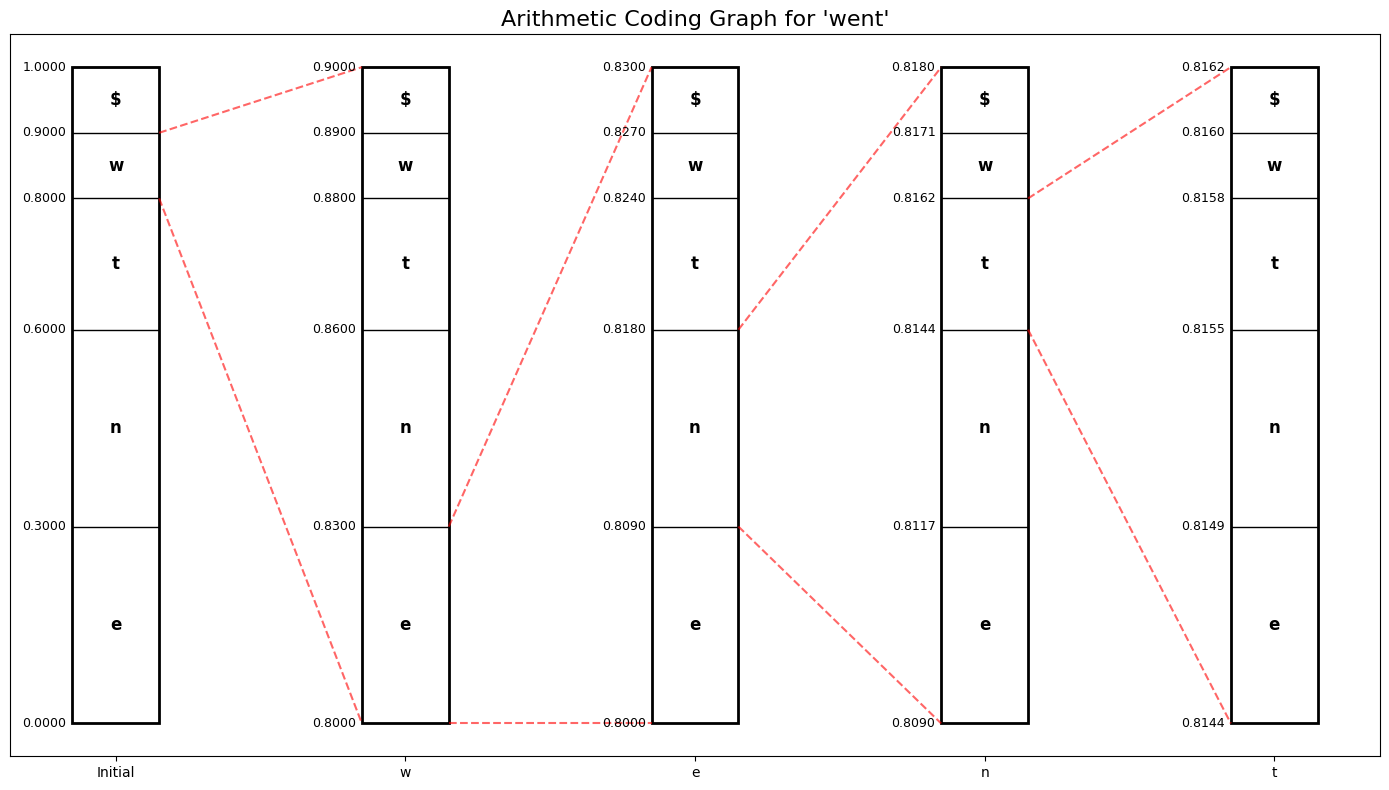

In [10]:
import matplotlib.pyplot as plt
import numpy as np

def plot_arithmetic_coding_graph(word, char_probs):
    # Order symbols from bottom to top for visualization
    symbols = ['e', 'n', 't', 'w', '$']
    cum_ranges = {}
    current_low = 0.0
    for s in symbols:
        p = char_probs[s]
        cum_ranges[s] = (current_low, current_low + p)
        current_low += p

    stages = [{'low': 0.0, 'high': 1.0, 'char': 'Initial'}]
    low, high = 0.0, 1.0

    # Calculate subdivision values for each step
    for char in word:
        r = high - low
        s_low_rel, s_high_rel = cum_ranges[char]
        new_low = low + r * s_low_rel
        new_high = low + r * s_high_rel
        stages.append({'low': new_low, 'high': new_high, 'char': char})
        low, high = new_low, new_high

    fig, ax = plt.subplots(figsize=(14, 8))
    num_stages = len(stages)
    bar_width = 0.3
    
    for i in range(num_stages):
        curr = stages[i]
        s_low_abs, s_high_abs = curr['low'], curr['high']
        s_range_abs = s_high_abs - s_low_abs
        
        # Draw the magnified bar (0 to 1 scale for visual consistency)
        ax.add_patch(plt.Rectangle((i - bar_width/2, 0), bar_width, 1, fill=False, edgecolor='black', lw=2))
        
        # Subdivide and label each symbol
        for s in symbols:
            s_low_rel, s_high_rel = cum_ranges[s]
            ax.hlines(s_high_rel, i - bar_width/2, i + bar_width/2, colors='black', lw=1)
            ax.text(i, (s_low_rel + s_high_rel) / 2, s, ha='center', va='center', fontsize=12, fontweight='bold')
            
            # Label absolute boundary values on the left of each bar
            abs_val = s_low_abs + s_range_abs * s_low_rel
            ax.text(i - bar_width/2 - 0.02, s_low_rel, f"{abs_val:.4f}", ha='right', va='center', fontsize=9)
            if s == symbols[-1]:
                ax.text(i - bar_width/2 - 0.02, 1.0, f"{s_high_abs:.4f}", ha='right', va='center', fontsize=9)

        # Draw red dashed lines connecting to the next stage's "magnified" view
        if i < num_stages - 1:
            next_char = stages[i+1]['char']
            c_low_rel, c_high_rel = cum_ranges[next_char]
            ax.plot([i + bar_width/2, i+1 - bar_width/2], [c_low_rel, 0], 'r--', alpha=0.6)
            ax.plot([i + bar_width/2, i+1 - bar_width/2], [c_high_rel, 1], 'r--', alpha=0.6)

    ax.set_xticks(np.arange(num_stages))
    ax.set_xticklabels([s['char'] for s in stages])
    ax.set_yticks([]) # Absolute values are labeled on the bars
    ax.set_title(f"Arithmetic Coding Graph for '{word}'", fontsize=16)
    plt.tight_layout()
    plt.show()

# Execution
char_probs = {'e': 0.3, 'n': 0.3, 't': 0.2, 'w': 0.1, '$': 0.1}
plot_arithmetic_coding_graph("went", char_probs)


# STATIC HUFFMAN

### encoding:

1. Average Bits Formula Used:
    $Lavg​=∑pi​×li​$

    Where:
    1. $𝑝𝑖$ = probability
    2. $𝑙𝑖$ = length of Huffman code

2. Clean Hierarchical Tree:
    1. Internal node = weight
    2. Leaf node = symbol + probability
    3. Edges labeled 0 and 1

3. Entropy:
    $H=−∑pi​log2​pi​$

4. Efficiency:
    $η=H/Lavg$

5. Redundancy:
    $R=1−η$


STEP-BY-STEP MERGE ORDER:

   Step Node1  Prob1 Node2  Prob2  Merged Weight
0     1     E  0.055     F  0.055           0.11
1     2     G  0.055     H  0.055           0.11
2     3  Node  0.110  Node  0.110           0.22
3     4     D  0.140     C  0.140           0.28
4     5  Node  0.220     B  0.250           0.47
5     6     A  0.250  Node  0.280           0.53
6     7  Node  0.470  Node  0.530           1.00

HUFFMAN CODES:

A : 10
B : 01
C : 111
D : 110
E : 0000
F : 0001
G : 0010
H : 0011

Original Message: ABCDABEFGH
Encoded Message: 100111111010010000000100100011

Average Code Length (Lavg) = 2.72
Entropy (H) = 2.7148
Efficiency (η) = 0.9981
Redundancy (R) = 0.0019


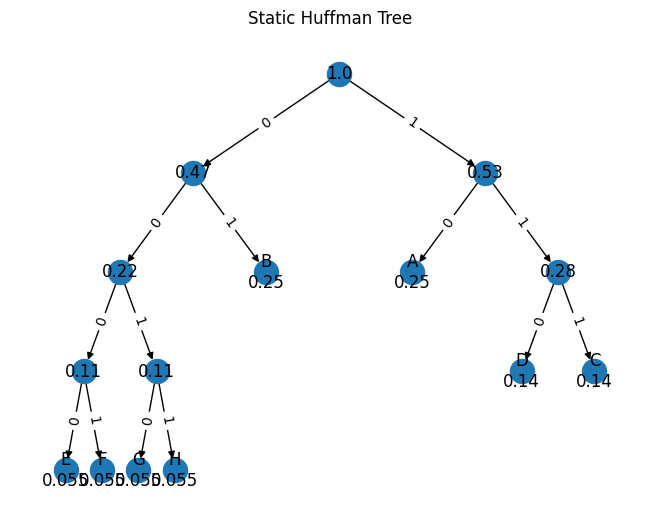

In [11]:
import heapq
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd
import math

# ==========================================================
# Node Class
# ==========================================================
class Node:
    def __init__(self, symbol, prob):
        self.symbol = symbol
        self.prob = prob
        self.left = None
        self.right = None

    def __lt__(self, other):
        return self.prob < other.prob


# ==========================================================
# Build Huffman Tree + Store Merge Order
# ==========================================================
def build_huffman(symbols, probabilities):
    heap = []
    merge_steps = []

    for s, p in zip(symbols, probabilities):
        heapq.heappush(heap, Node(s, p))

    step = 1

    while len(heap) > 1:
        left = heapq.heappop(heap)
        right = heapq.heappop(heap)

        merged_prob = left.prob + right.prob

        merge_steps.append([
            step,
            left.symbol if left.symbol else "Node",
            left.prob,
            right.symbol if right.symbol else "Node",
            right.prob,
            round(merged_prob,4)
        ])

        parent = Node(None, merged_prob)
        parent.left = left
        parent.right = right

        heapq.heappush(heap, parent)
        step += 1

    return heap[0], merge_steps


# ==========================================================
# Generate Codes
# ==========================================================
def generate_codes(node, code="", codes=None):
    if codes is None:
        codes = {}

    if node.symbol is not None:
        codes[node.symbol] = code
        return codes

    generate_codes(node.left, code + "0", codes)
    generate_codes(node.right, code + "1", codes)

    return codes


# ==========================================================
# Encode Message
# ==========================================================
def encode_message(message, codes):
    return "".join(codes[ch] for ch in message)




# ==========================================================
# Tree to Graph
# ==========================================================
def add_edges(graph, node):
    if node.left:
        graph.add_edge(id(node), id(node.left), label="0")
        add_edges(graph, node.left)

    if node.right:
        graph.add_edge(id(node), id(node.right), label="1")
        add_edges(graph, node.right)


def get_labels(node, labels):
    if node.symbol:
        labels[id(node)] = f"{node.symbol}\n{node.prob}"
    else:
        labels[id(node)] = f"{round(node.prob,3)}"

    if node.left:
        get_labels(node.left, labels)
    if node.right:
        get_labels(node.right, labels)


# ==========================================================
# Hierarchical Layout
# ==========================================================
def hierarchy_pos(G, root, width=1.0, vert_gap=0.15, vert_loc=0, xcenter=0.5):
    pos = {root: (xcenter, vert_loc)}
    children = list(G.successors(root))

    if children:
        dx = width / len(children)
        nextx = xcenter - width/2 - dx/2

        for child in children:
            nextx += dx
            pos.update(
                hierarchy_pos(
                    G,
                    child,
                    width=dx,
                    vert_gap=vert_gap,
                    vert_loc=vert_loc - vert_gap,
                    xcenter=nextx
                )
            )
    return pos


# ==========================================================
# INPUT DATA
# ==========================================================
symbols = ["A","B","C","D","E","F","G","H"]
frequencies = [0.25,0.25,0.14,0.14,0.055,0.055,0.055,0.055]

# ==========================================================
# Build Tree
# ==========================================================
root, merge_steps = build_huffman(symbols, frequencies)

# ==========================================================
# Generate Codes
# ==========================================================
codes = generate_codes(root)

# ==========================================================
# Average Code Length
# ==========================================================
Lavg = sum(p * len(codes[s]) for s, p in zip(symbols, frequencies))

# ==========================================================
# Entropy
# ==========================================================
H = -sum(p * math.log2(p) for p in frequencies)

# ==========================================================
# Efficiency & Redundancy
# ==========================================================
efficiency = H / Lavg
redundancy = 1 - efficiency

# ==========================================================
# Display Merge Order Table
# ==========================================================
merge_df = pd.DataFrame(merge_steps, columns=[
    "Step",
    "Node1",
    "Prob1",
    "Node2",
    "Prob2",
    "Merged Weight"
])

print("\nSTEP-BY-STEP MERGE ORDER:\n")
print(merge_df)

# ==========================================================
# Display Code Table
# ==========================================================
print("\nHUFFMAN CODES:\n")
for s in symbols:
    print(f"{s} : {codes[s]}")

# ==========================================================
# ENCODING + DECODING TEST
# ==========================================================
message = "ABCDABEFGH"

print("\nOriginal Message:", message)

encoded_msg = encode_message(message, codes)
print("Encoded Message:", encoded_msg)

# ==========================================================
# Display Information Theory Results
# ==========================================================
print("\nAverage Code Length (Lavg) =", round(Lavg,4))
print("Entropy (H) =", round(H,4))
print("Efficiency (η) =", round(efficiency,4))
print("Redundancy (R) =", round(redundancy,4))


# ==========================================================
# Plot Tree
# ==========================================================
G = nx.DiGraph()
add_edges(G, root)

labels = {}
get_labels(root, labels)

pos = hierarchy_pos(G, id(root))

plt.figure()
nx.draw(G, pos, labels=labels, with_labels=True)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.title("Static Huffman Tree")
plt.show()


### DECODING

In [12]:
def decode_huffman(encoded_string, root):
    decoded_output = ""
    current = root

    for bit in encoded_string:
        if bit == "0":
            current = current.left
        else:
            current = current.right

        # When leaf node reached
        if current.symbol is not None:
            decoded_output += current.symbol
            current = root   # Reset to root

    return decoded_output
    
message = "ABCDABEFGH"

print("\nOriginal Message:", message)

# Encode using previously generated codes
encoded_msg = encode_message(message, codes)
print("Encoded Message:", encoded_msg)

# Decode using previously built tree
decoded_msg = decode_huffman(encoded_msg, root)
print("Decoded Message:", decoded_msg)

# Verification
if message == decoded_msg:
    print("\nDecoding Successful!!")
else:
    print("\nDecoding Failed!!")



Original Message: ABCDABEFGH
Encoded Message: 100111111010010000000100100011
Decoded Message: ABCDABEFGH

Decoding Successful!!


# DYNAMIC (ADAPTIVE) HUFFMAN CODING [(Faller–Gallager–Knuth) Adaptive Huffman Algorithm]:

FGK Core Rules (Proper Implementation)

1. Every node has:
    1. weight
    2. order
2. Order numbers decrease from top to bottom.
3. When updating:
    1. Find highest-order node with same weight
    2. Swap (if not ancestor)
    3. Increment weight
4. NYT node is always lowest order

In [13]:
import matplotlib.pyplot as plt
import networkx as nx

In [14]:
class FGKNode:
    def __init__(self, symbol=None, weight=0, order=0):
        self.symbol = symbol
        self.weight = weight
        self.order = order
        self.left = None
        self.right = None
        self.parent = None


class FGK:
    def __init__(self):
        self.max_order = 512
        self.root = FGKNode(order=self.max_order)
        self.NYT = self.root
        self.nodes = {}
        self.next_order = self.max_order - 1
        self.step = 1

    # ======================================================
    # TREE VISUALIZATION
    # ======================================================
    def add_edges(self, G, node):
        if node.left:
            G.add_edge(id(node), id(node.left))
            self.add_edges(G, node.left)
        if node.right:
            G.add_edge(id(node), id(node.right))
            self.add_edges(G, node.right)

    def get_labels(self, node, labels):
        if node.symbol:
            labels[id(node)] = f"{node.symbol}\nW:{node.weight}\nO:{node.order}"
        else:
            labels[id(node)] = f"W:{node.weight}\nO:{node.order}"

        if node.left:
            self.get_labels(node.left, labels)
        if node.right:
            self.get_labels(node.right, labels)

    def hierarchy_pos(self, G, root, width=1., vert_gap=0.2,
                      vert_loc=0, xcenter=0.5):

        pos = {root: (xcenter, vert_loc)}
        children = list(G.successors(root))

        if children:
            dx = width / len(children)
            nextx = xcenter - width/2 - dx/2
            for child in children:
                nextx += dx
                pos.update(self.hierarchy_pos(
                    G, child,
                    width=dx,
                    vert_gap=vert_gap,
                    vert_loc=vert_loc-vert_gap,
                    xcenter=nextx))
        return pos

    def draw_tree(self, highlight=None, title="FGK Tree", big=False):

        G = nx.DiGraph()
        self.add_edges(G, self.root)

        labels = {}
        self.get_labels(self.root, labels)

        pos = self.hierarchy_pos(G, id(self.root))

        size = (10,6) if big else (6,4)

        plt.figure(figsize=size)

        node_colors = []
        for node_id in G.nodes():
            if highlight and node_id in highlight:
                node_colors.append("green")
            else:
                node_colors.append("lightblue")

        nx.draw(G, pos,
                labels=labels,
                with_labels=True,
                node_color=node_colors,
                node_size=1500,
                font_size=7)

        plt.title(title, fontsize=10)
        plt.show()

    # ======================================================
    # BLOCK TABLE
    # ======================================================
    def print_block_table(self):
        blocks = {}
        stack = [self.root]

        while stack:
            node = stack.pop()

            if node.weight not in blocks:
                blocks[node.weight] = []

            blocks[node.weight].append(
                (node.symbol if node.symbol else "Internal",
                 node.order)
            )

            if node.left:
                stack.append(node.left)
            if node.right:
                stack.append(node.right)

        print("\n===== BLOCK TABLE =====")
        for weight in sorted(blocks.keys()):
            print(f"\nWeight {weight}:")
            for sym, order in sorted(blocks[weight],
                                     key=lambda x: -x[1]):
                print(f"   {sym} (Order {order})")

    # ======================================================
    # CORE LOGIC
    # ======================================================
    def get_code(self, node):
        code = ""
        while node.parent:
            if node.parent.left == node:
                code = "0" + code
            else:
                code = "1" + code
            node = node.parent
        return code

    def is_ancestor(self, a, b):
        while b:
            if b == a:
                return True
            b = b.parent
        return False

    def find_highest(self, weight):
        stack = [self.root]
        candidate = None

        while stack:
            node = stack.pop()
            if node.weight == weight:
                if candidate is None or node.order > candidate.order:
                    candidate = node
            if node.left:
                stack.append(node.left)
            if node.right:
                stack.append(node.right)

        return candidate

    # ======================================================
    # SWAP (WITH SIDE-BY-SIDE VISUAL)
    # ======================================================
    def swap(self, n1, n2):

        if n1 == n2:
            return
        if self.is_ancestor(n1, n2) or self.is_ancestor(n2, n1):
            return

        print("\n>>> SWAP DETECTED <<<")

        # Draw BEFORE
        self.draw_tree(
            highlight=[id(n1), id(n2)],
            title="Before Swap",
            big=True
        )

        p1, p2 = n1.parent, n2.parent

        if p1.left == n1:
            p1.left = n2
        else:
            p1.right = n2

        if p2.left == n2:
            p2.left = n1
        else:
            p2.right = n1

        n1.parent, n2.parent = p2, p1
        n1.order, n2.order = n2.order, n1.order

        # Draw AFTER
        self.draw_tree(
            highlight=[id(n1), id(n2)],
            title="After Swap",
            big=True
        )

    def update(self, node):
        while node:
            highest = self.find_highest(node.weight)

            if highest and highest != node and highest != node.parent:
                self.swap(node, highest)

            node.weight += 1
            node = node.parent

    def insert(self, symbol):
        internal = FGKNode(weight=0, order=self.next_order)
        self.next_order -= 1

        leaf = FGKNode(symbol=symbol,
                       weight=1,
                       order=self.next_order)
        self.next_order -= 1

        internal.left = self.NYT
        internal.right = leaf
        internal.parent = self.NYT.parent

        if self.NYT.parent:
            if self.NYT.parent.left == self.NYT:
                self.NYT.parent.left = internal
            else:
                self.NYT.parent.right = internal
        else:
            self.root = internal

        self.NYT.parent = internal
        leaf.parent = internal

        self.nodes[symbol] = leaf
        self.update(internal)

    # ======================================================
    # ENCODE (FULL STEP VISUAL)
    # ======================================================
    def encode(self, text):

        encoded = ""
        self.step = 1

        print("\n===== FGK FULL STEP VISUALIZATION =====\n")

        for ch in text:

            print(f"\nStep {self.step}: Processing '{ch}'")

            highlight = []

            if ch in self.nodes:
                node = self.nodes[ch]
                code = self.get_code(node)
                encoded += code
                print("Existing Symbol Code:", code)
                highlight.append(id(node))
                self.update(node)

            else:
                nyt_code = self.get_code(self.NYT)
                ascii_code = format(ord(ch), '08b')
                encoded += nyt_code + ascii_code

                print("New Symbol → NYT:", nyt_code)
                print("ASCII:", ascii_code)

                highlight.append(id(self.NYT))
                self.insert(ch)

            self.print_block_table()
            self.draw_tree(
                highlight=highlight,
                title=f"Tree After Step {self.step}"
            )

            self.step += 1

        print("\nFinal Encoded:", encoded)
        return encoded

    # ======================================================
    # DECODE (FULL STEP VISUAL)
    # ======================================================
    def decode(self, encoded):

        decoded = ""
        i = 0
        node = self.root
        self.step = 1

        print("\n===== FGK FULL DECODE VISUALIZATION =====\n")

        while True:

            if node.symbol:
                print(f"\nStep {self.step}: Decoded '{node.symbol}'")
                decoded += node.symbol
                self.update(node)
                node = self.root

                self.print_block_table()
                self.draw_tree(title=f"Decode Step {self.step}")

                self.step += 1

                if i >= len(encoded):
                    break
                continue

            if node == self.NYT:
                if i + 8 > len(encoded):
                    break

                symbol = chr(int(encoded[i:i+8], 2))
                i += 8

                print(f"\nStep {self.step}: New Symbol '{symbol}'")

                decoded += symbol
                self.insert(symbol)
                node = self.root

                self.print_block_table()
                self.draw_tree(title=f"Decode Step {self.step}")

                self.step += 1
                continue

            if i >= len(encoded):
                break

            if encoded[i] == "0":
                node = node.left
            else:
                node = node.right

            i += 1

        print("\nFinal Decoded:", decoded)
        return decoded



===== FGK FULL STEP VISUALIZATION =====


Step 1: Processing 'A'
New Symbol → NYT: 
ASCII: 01000001

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   Internal (Order 511)
   A (Order 510)


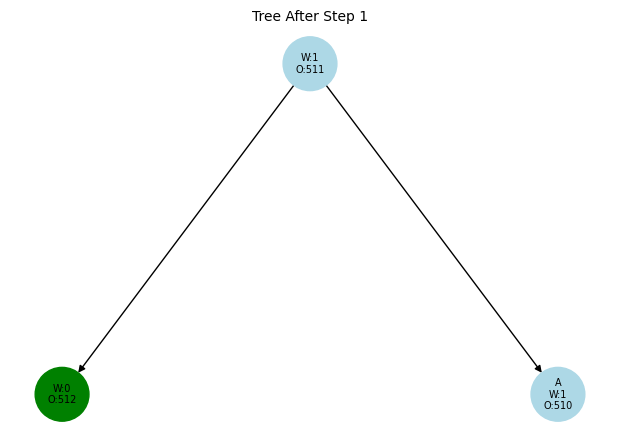


Step 2: Processing 'A'
Existing Symbol Code: 1

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 2:
   Internal (Order 511)
   A (Order 510)


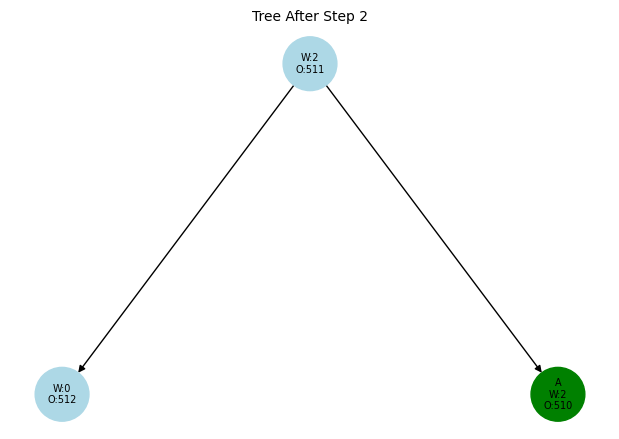


Step 3: Processing 'D'
New Symbol → NYT: 0
ASCII: 01000100

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   Internal (Order 509)
   D (Order 508)

Weight 2:
   A (Order 510)

Weight 3:
   Internal (Order 511)


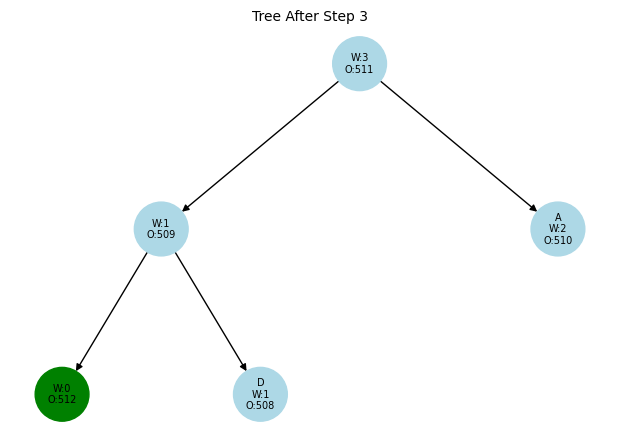


Step 4: Processing 'C'
New Symbol → NYT: 00
ASCII: 01000011

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   D (Order 508)
   Internal (Order 507)
   C (Order 506)

Weight 2:
   A (Order 510)
   Internal (Order 509)

Weight 4:
   Internal (Order 511)


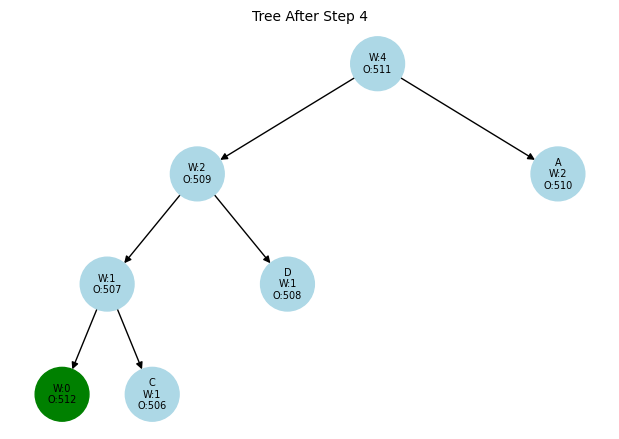


Step 5: Processing 'C'
Existing Symbol Code: 001

>>> SWAP DETECTED <<<


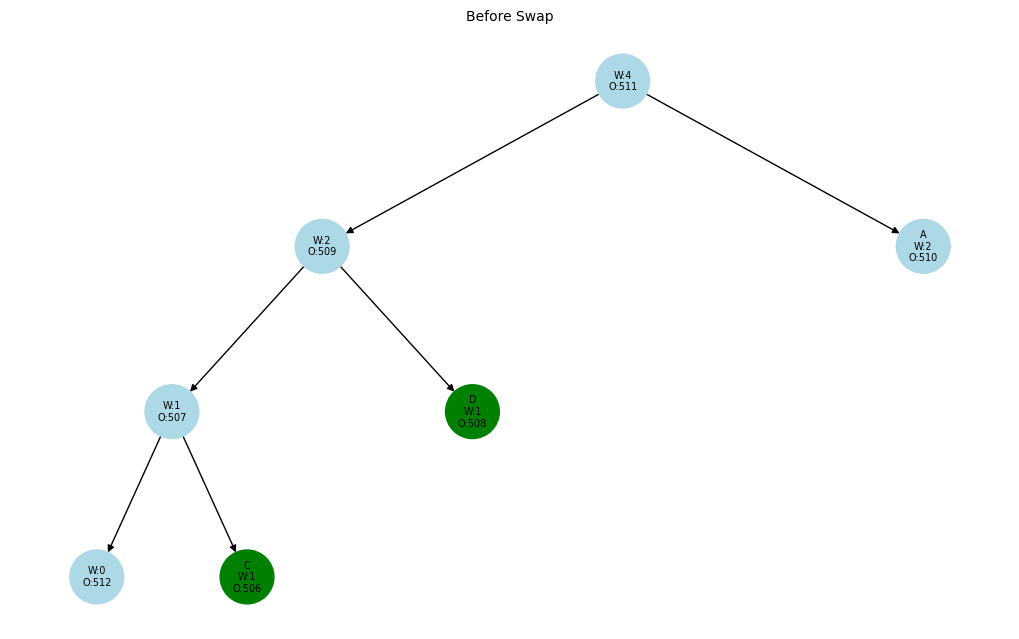

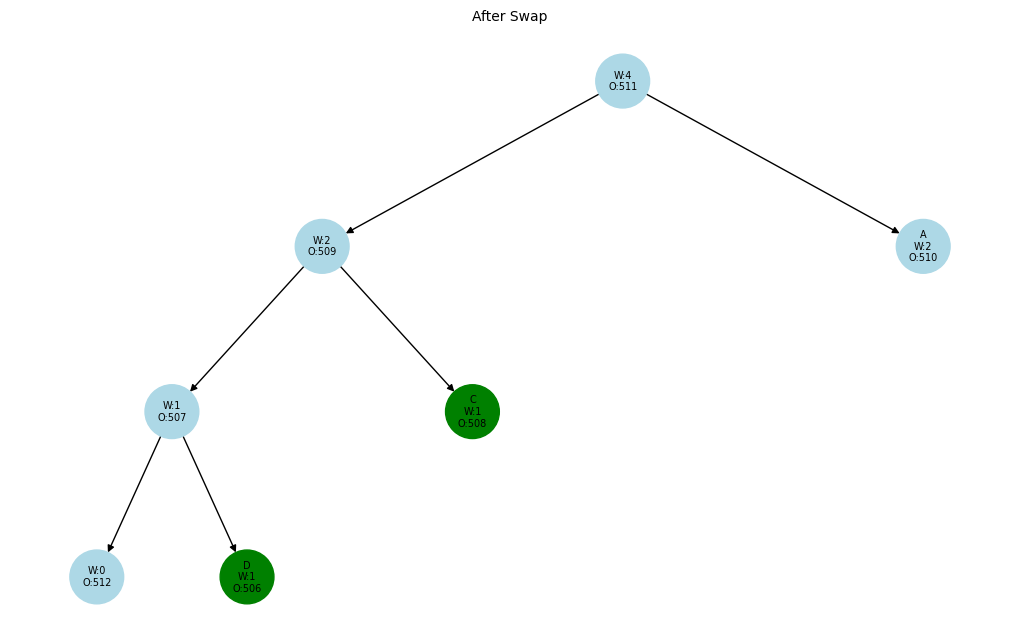


>>> SWAP DETECTED <<<


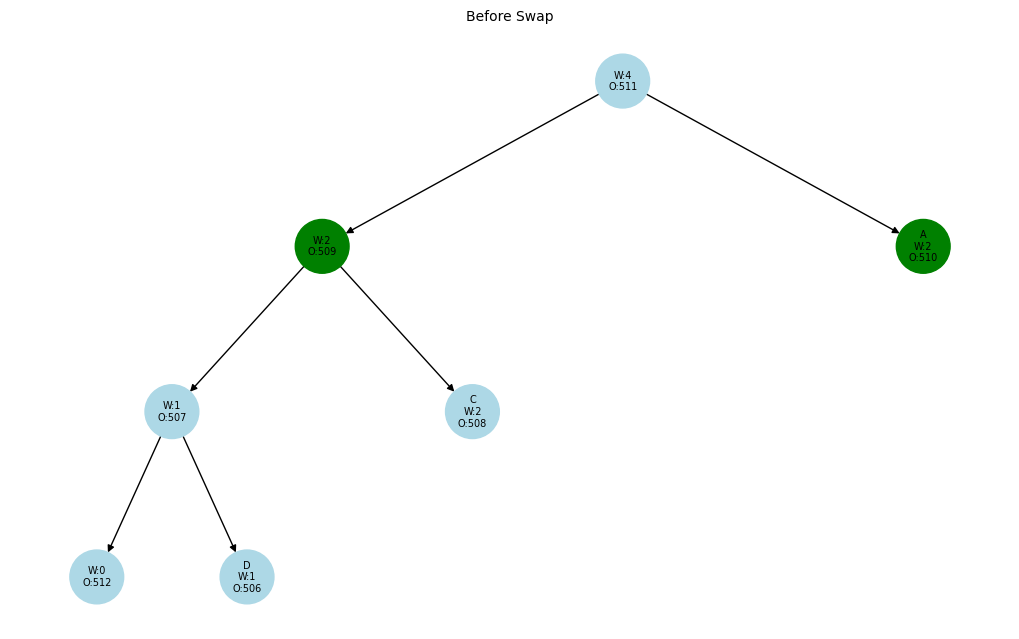

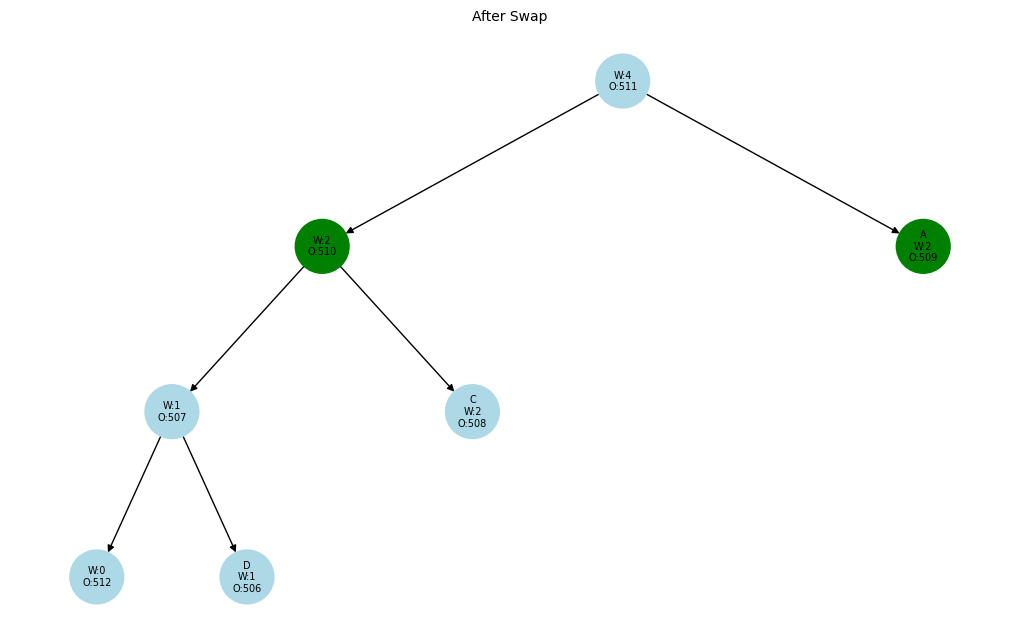


===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   Internal (Order 507)
   D (Order 506)

Weight 2:
   A (Order 509)
   C (Order 508)

Weight 3:
   Internal (Order 510)

Weight 5:
   Internal (Order 511)


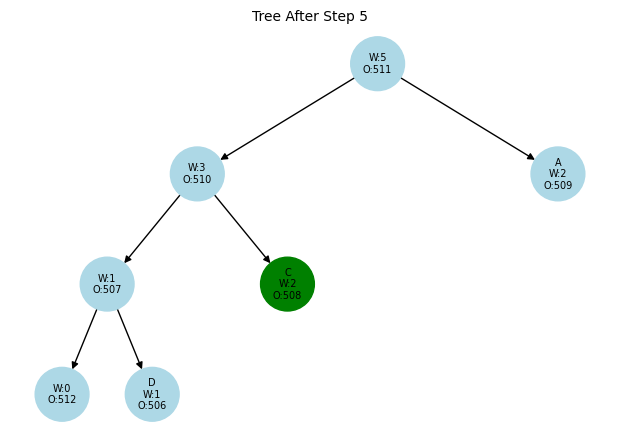


Step 6: Processing 'D'
Existing Symbol Code: 001

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 2:
   A (Order 509)
   C (Order 508)
   Internal (Order 507)
   D (Order 506)

Weight 4:
   Internal (Order 510)

Weight 6:
   Internal (Order 511)


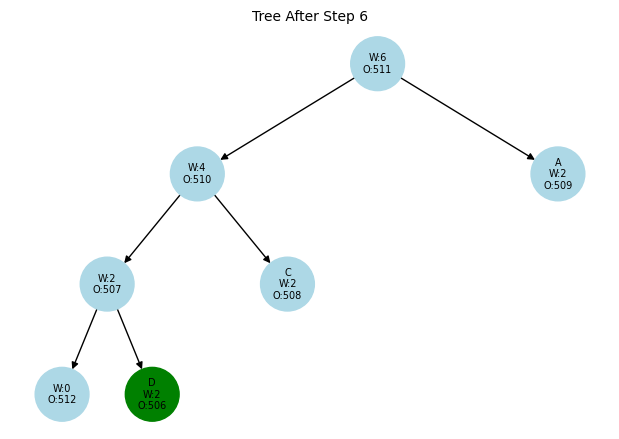


Step 7: Processing 'D'
Existing Symbol Code: 001

>>> SWAP DETECTED <<<


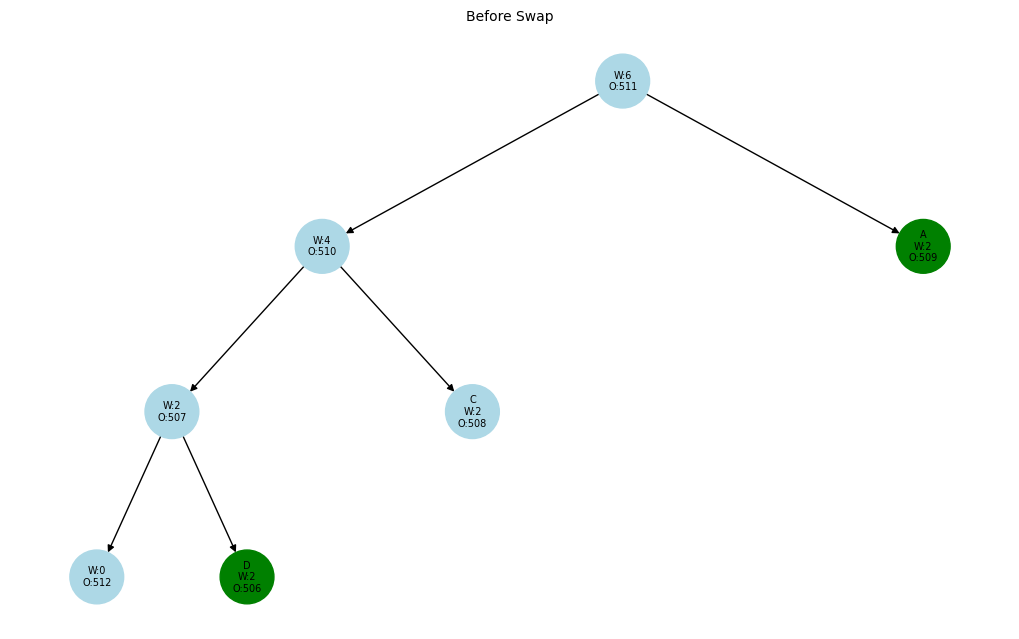

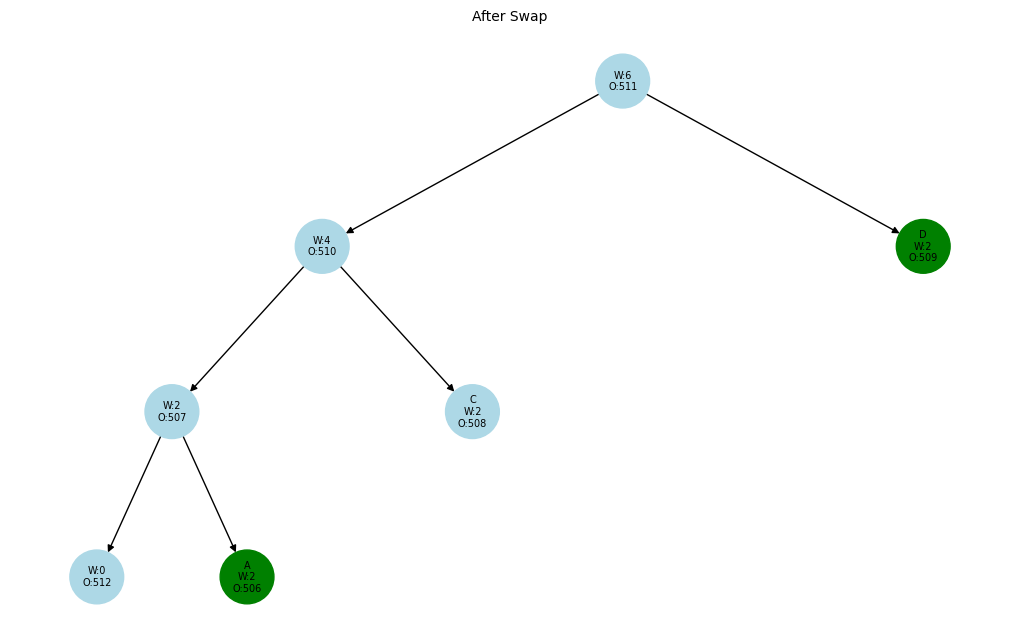


===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 2:
   C (Order 508)
   Internal (Order 507)
   A (Order 506)

Weight 3:
   D (Order 509)

Weight 4:
   Internal (Order 510)

Weight 7:
   Internal (Order 511)


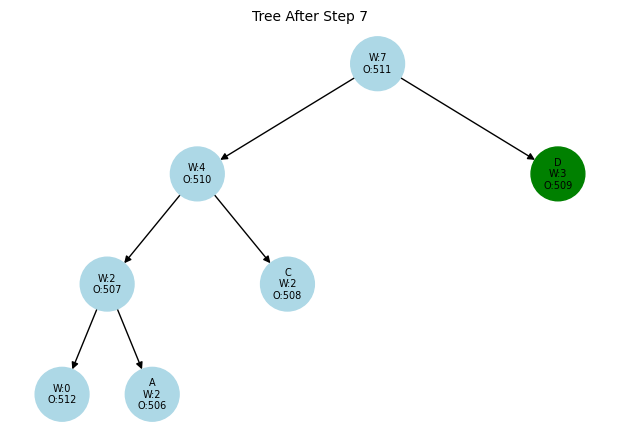


Final Encoded: 0100000110010001000001000011001001001


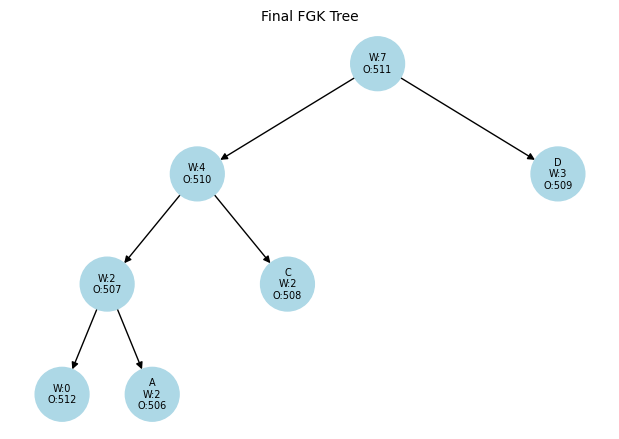


===== FGK FULL DECODE VISUALIZATION =====


Step 1: New Symbol 'A'

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   Internal (Order 511)
   A (Order 510)


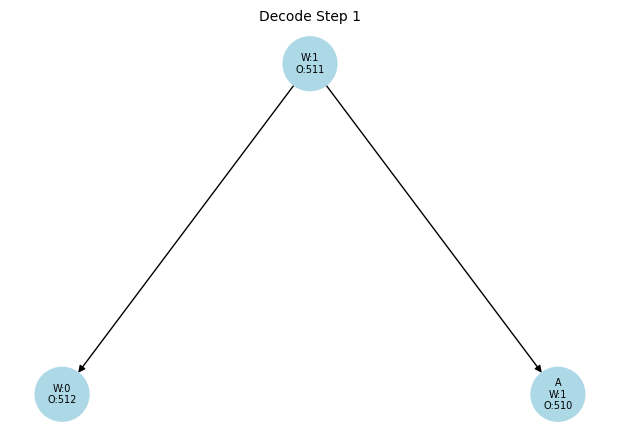


Step 2: Decoded 'A'

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 2:
   Internal (Order 511)
   A (Order 510)


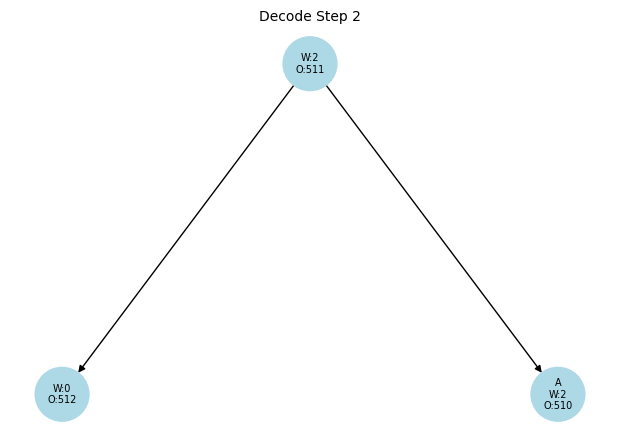


Step 3: New Symbol 'D'

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   Internal (Order 509)
   D (Order 508)

Weight 2:
   A (Order 510)

Weight 3:
   Internal (Order 511)


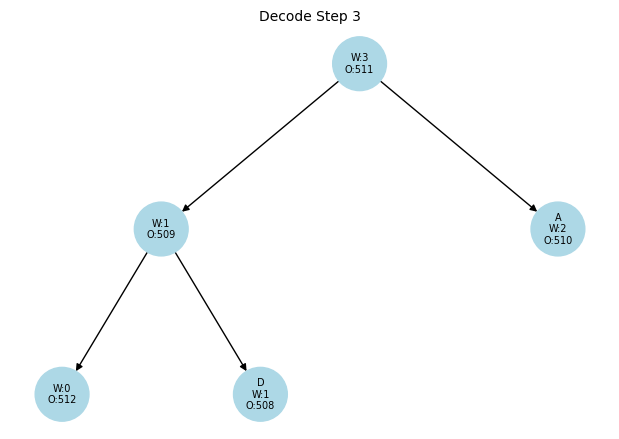


Step 4: New Symbol 'C'

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   D (Order 508)
   Internal (Order 507)
   C (Order 506)

Weight 2:
   A (Order 510)
   Internal (Order 509)

Weight 4:
   Internal (Order 511)


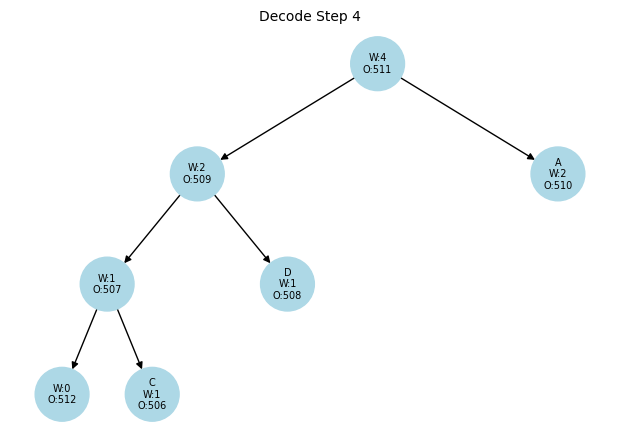


Step 5: Decoded 'C'

>>> SWAP DETECTED <<<


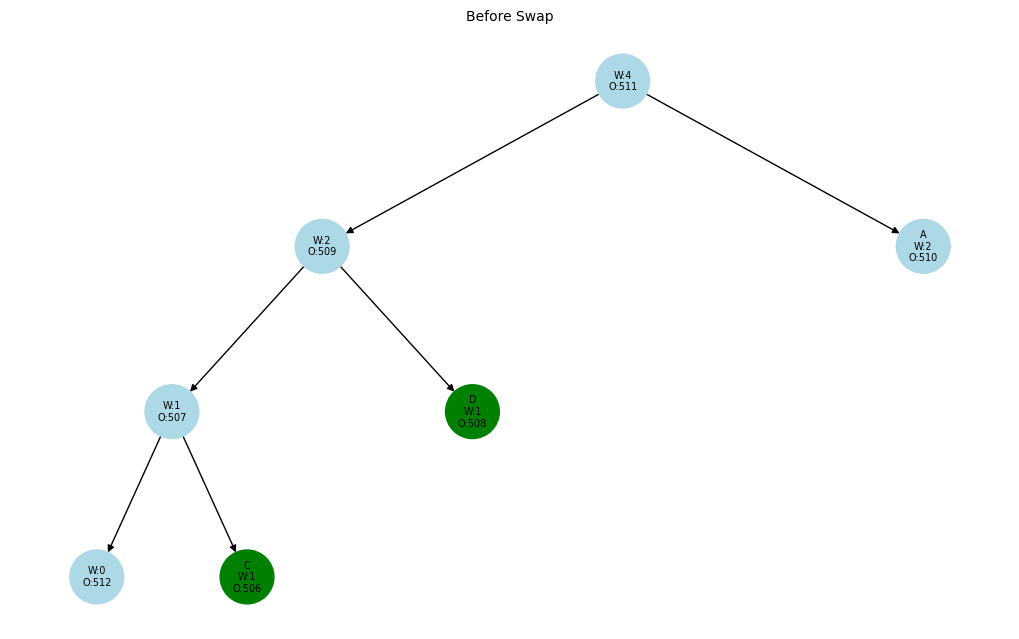

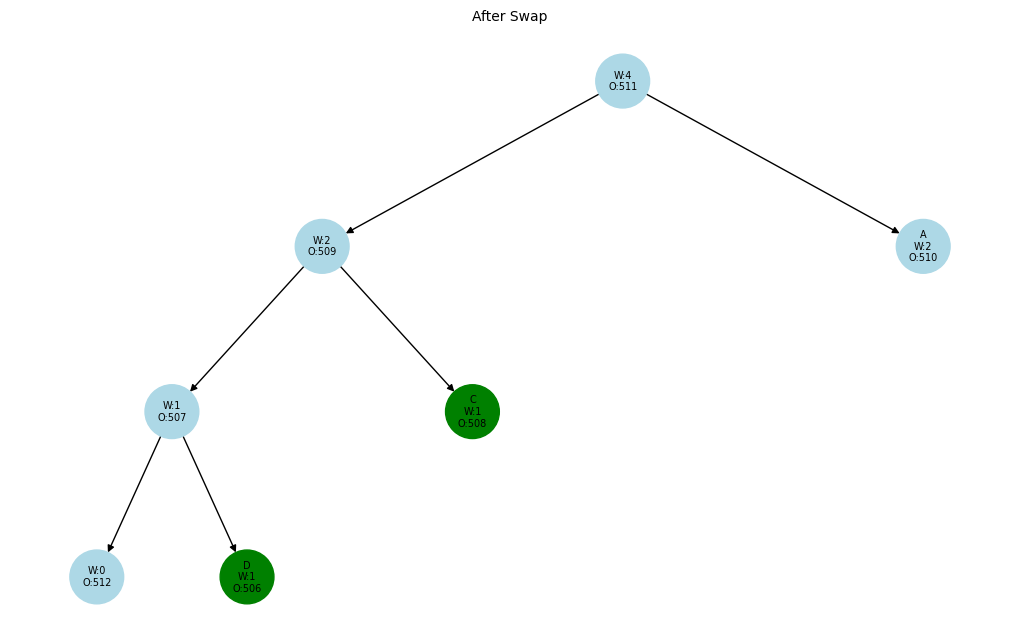


>>> SWAP DETECTED <<<


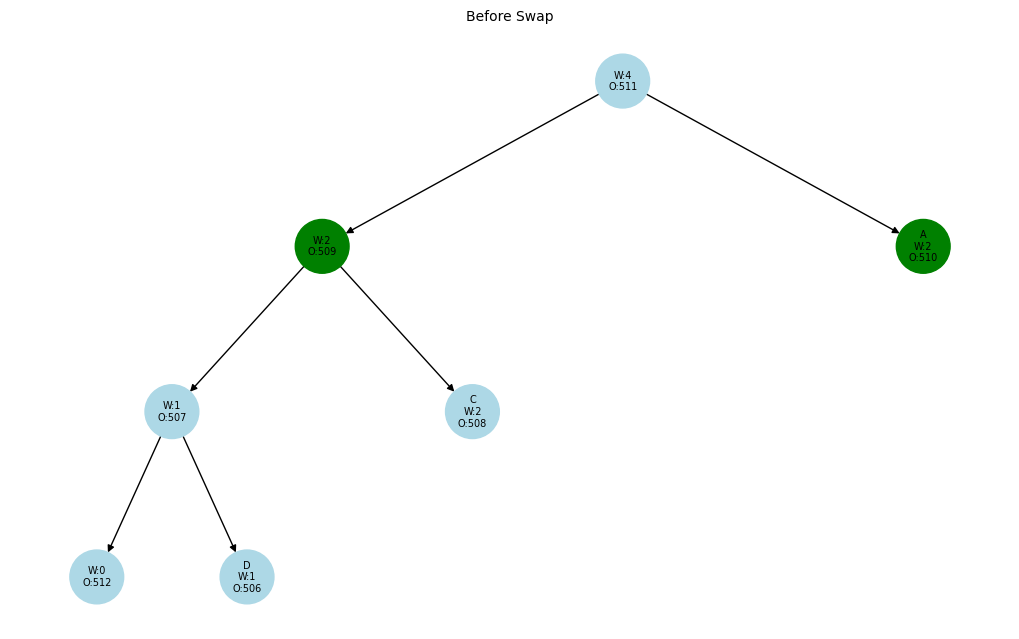

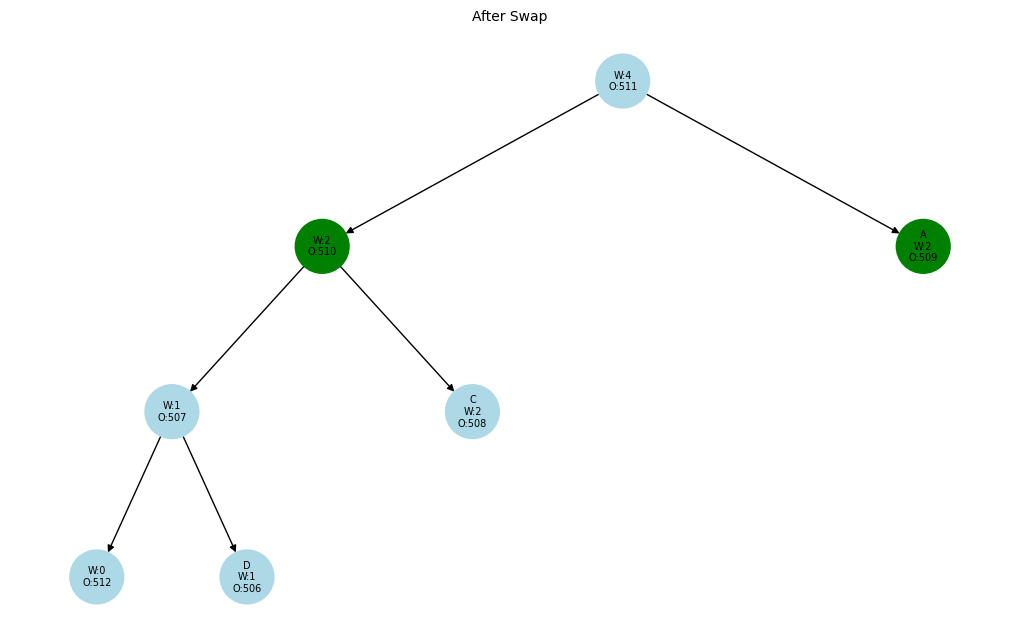


===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 1:
   Internal (Order 507)
   D (Order 506)

Weight 2:
   A (Order 509)
   C (Order 508)

Weight 3:
   Internal (Order 510)

Weight 5:
   Internal (Order 511)


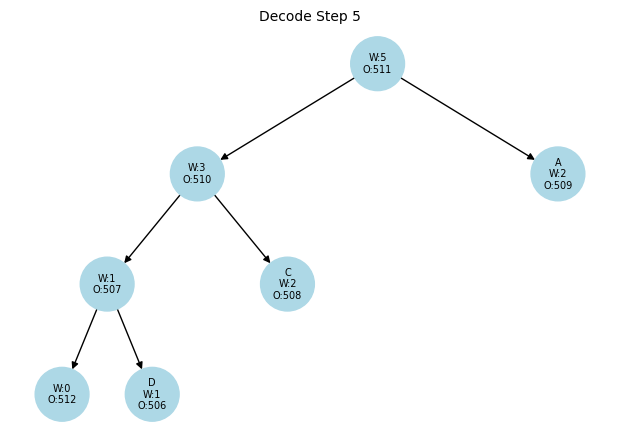


Step 6: Decoded 'D'

===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 2:
   A (Order 509)
   C (Order 508)
   Internal (Order 507)
   D (Order 506)

Weight 4:
   Internal (Order 510)

Weight 6:
   Internal (Order 511)


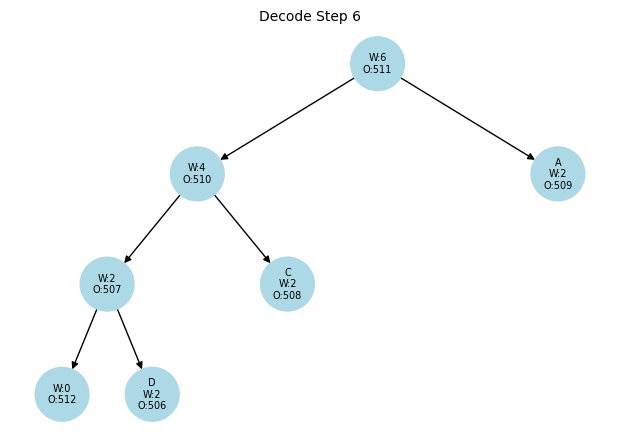


Step 7: Decoded 'D'

>>> SWAP DETECTED <<<


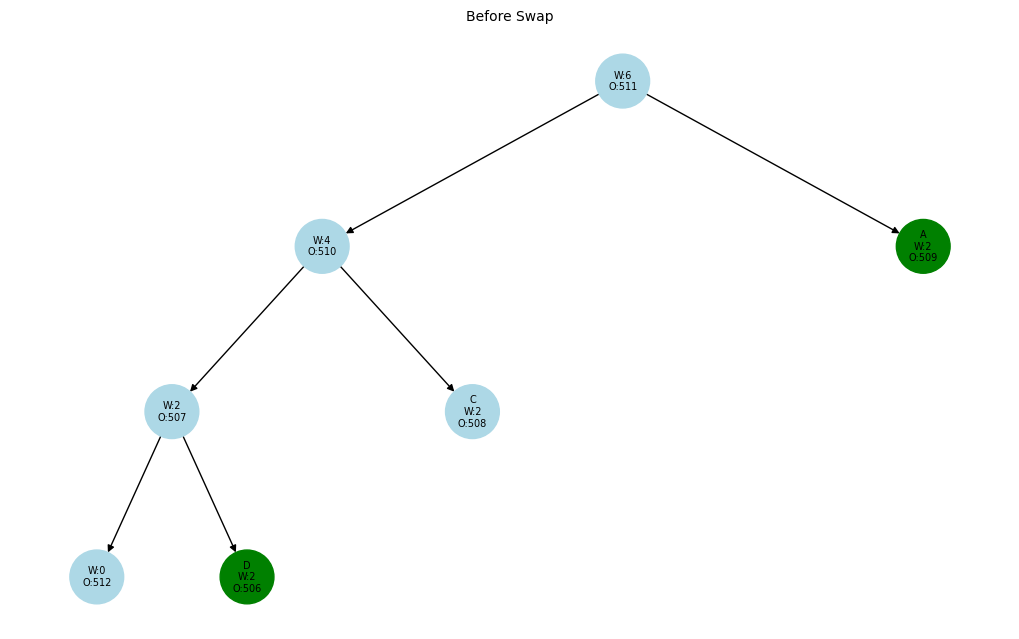

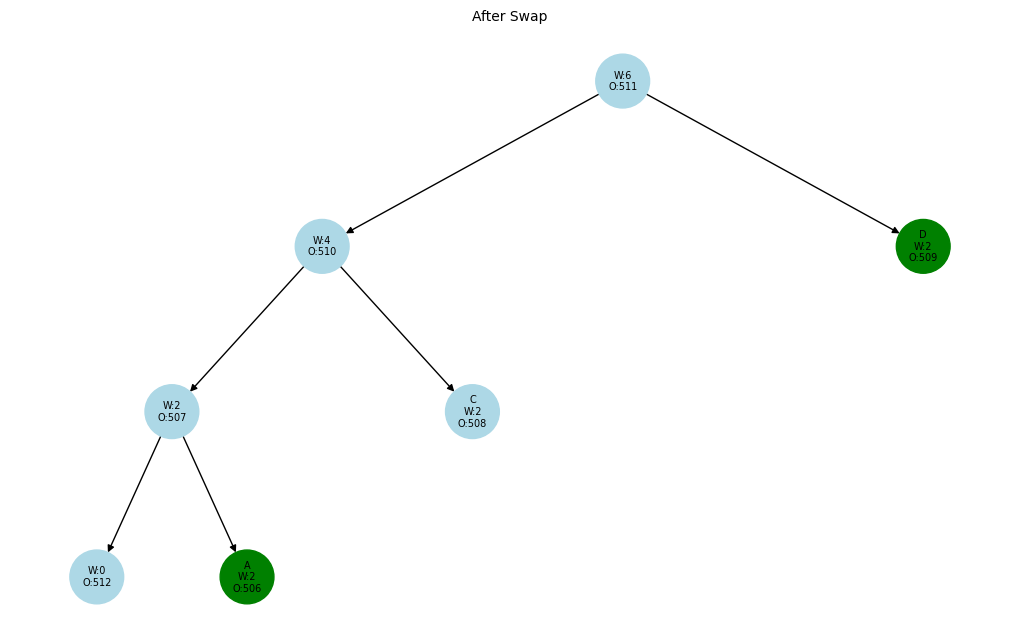


===== BLOCK TABLE =====

Weight 0:
   Internal (Order 512)

Weight 2:
   C (Order 508)
   Internal (Order 507)
   A (Order 506)

Weight 3:
   D (Order 509)

Weight 4:
   Internal (Order 510)

Weight 7:
   Internal (Order 511)


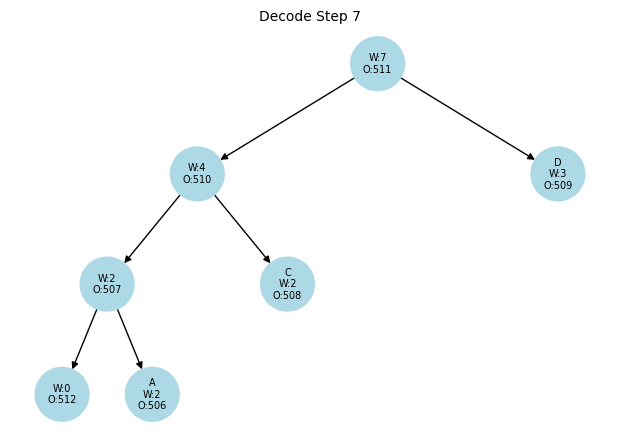


Final Decoded: AADCCDD
Original: AADCCDD
Encoded : 0100000110010001000001000011001001001
Decoded : AADCCDD
Correct : True


In [15]:
message = "AADCCDD"

fgk = FGK()
encoded = fgk.encode(message)

fgk.draw_tree(title="Final FGK Tree")

fgk_decoder = FGK()
decoded = fgk_decoder.decode(encoded)

print("Original:", message)
print("Encoded :", encoded)
print("Decoded :", decoded)
print("Correct :", message == decoded)
